In [1]:
import cv2
import numpy as np
import dlib

In [2]:
image=cv2.imread('input.png')

In [3]:
imageOriginal=image.copy()
img=image.copy()

In [4]:
detector=dlib.get_frontal_face_detector()
imageGray=cv2.cvtColor(imageOriginal,cv2.COLOR_BGR2GRAY)
faces=detector(imageGray)

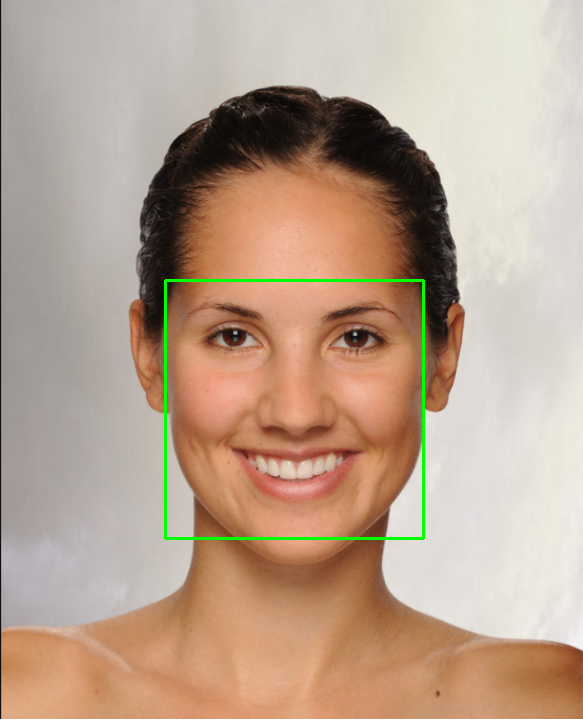

In [5]:
from google.colab.patches import cv2_imshow
for face in faces:
  x1,y1=face.left(),face.top()
  x2,y2=face.right(),face.bottom()
  imageOriginal=cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),2)
  cv2_imshow(imageOriginal)

In [6]:
### will take shape_predictor file 
!git clone https://github.com/nicolasmetallo/eameo-faceswap-generator

Cloning into 'eameo-faceswap-generator'...
remote: Enumerating objects: 266, done.
remote: Total 266 (delta 0), reused 0 (delta 0), pack-reused 266
Receiving objects: 100% (266/266), 168.59 MiB | 28.87 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [7]:
predictor=dlib.shape_predictor('/content/eameo-faceswap-generator/shape_predictor_68_face_landmarks.dat')

[[160, 331], [163, 369], [169, 406], [175, 444], [187, 480], [207, 512], [234, 538], [264, 560], [297, 568], [331, 560], [360, 538], [386, 510], [406, 478], [417, 443], [424, 405], [429, 368], [431, 331], [185, 315], [202, 302], [224, 301], [245, 307], [264, 317], [322, 317], [343, 307], [364, 302], [387, 303], [405, 317], [296, 341], [296, 367], [296, 394], [296, 422], [267, 429], [281, 434], [296, 440], [311, 434], [325, 429], [213, 340], [227, 331], [245, 333], [258, 346], [242, 347], [225, 346], [332, 347], [346, 335], [364, 333], [378, 342], [365, 348], [349, 349], [233, 449], [256, 448], [279, 448], [297, 452], [315, 448], [339, 448], [364, 450], [341, 483], [317, 498], [297, 501], [277, 497], [254, 481], [241, 453], [279, 458], [297, 461], [315, 458], [355, 453], [316, 480], [297, 483], [278, 479]]


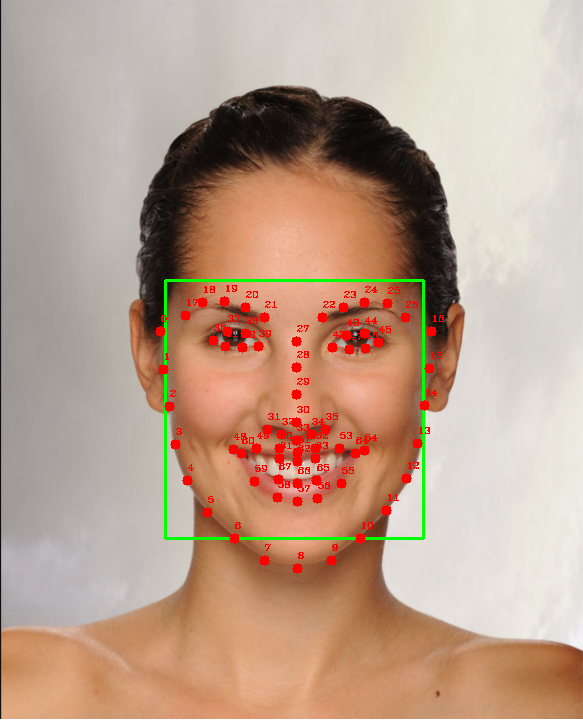

In [9]:
image=img.copy()
for face in faces:
  x1,y1=face.left(),face.top()
  x2,y2=face.right(),face.bottom()
  imageOriginal=cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),2)
  landmarks=predictor(imageGray,face)
  myPoints=[]
  for n in range(68):
    x=landmarks.part(n).x
    y=landmarks.part(n).y
    myPoints.append([x,y])
    cv2.circle(imageOriginal,(x,y),5,(0,0,255),cv2.FILLED)
    cv2.putText(imageOriginal,str(n),(x,y-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5,(0,0,255),1)
  print(myPoints)
cv2_imshow(imageOriginal)

In [12]:
upperlips = myPoints[48:55] + myPoints[60:65][::-1]
lowerlips = myPoints[48:49] + myPoints[54:60][::-1] + myPoints[64:]

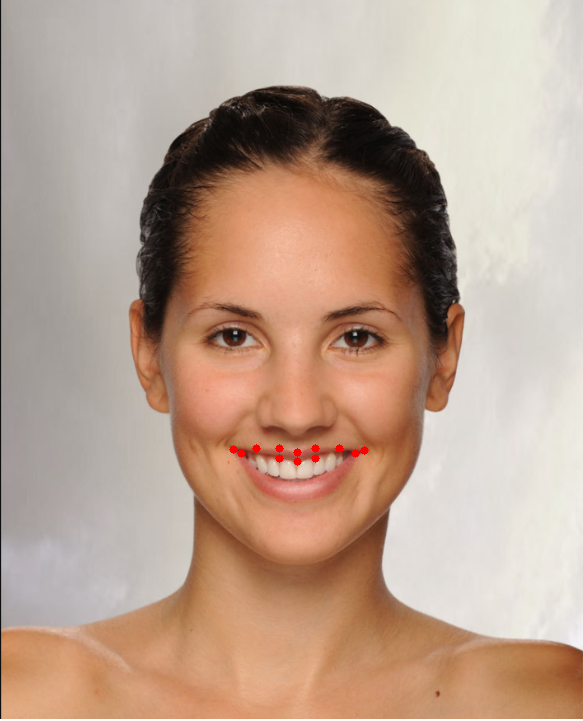

In [13]:
image=img.copy()
for i in upperlips:
  cv2.circle(image,tuple(i),4,(0,0,255),thickness=-1)
cv2_imshow(image)

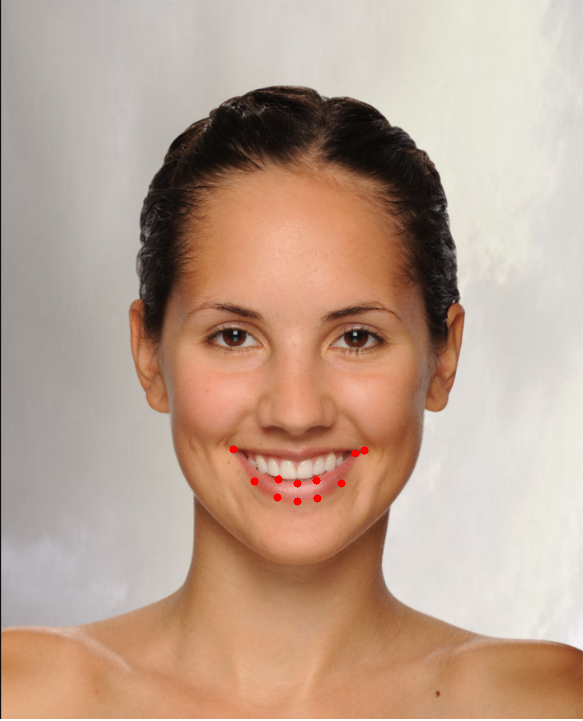

In [14]:
image=img.copy()
for i in lowerlips:
  cv2.circle(image,tuple(i),4,(0,0,255),thickness=-1)
cv2_imshow(image)

In [15]:
lips=upperlips+lowerlips
lips=np.array(lips)

In [16]:
image=img.copy()
mask=np.zeros_like(image)
mask=cv2.fillPoly(mask,[lips],(255,255,255))

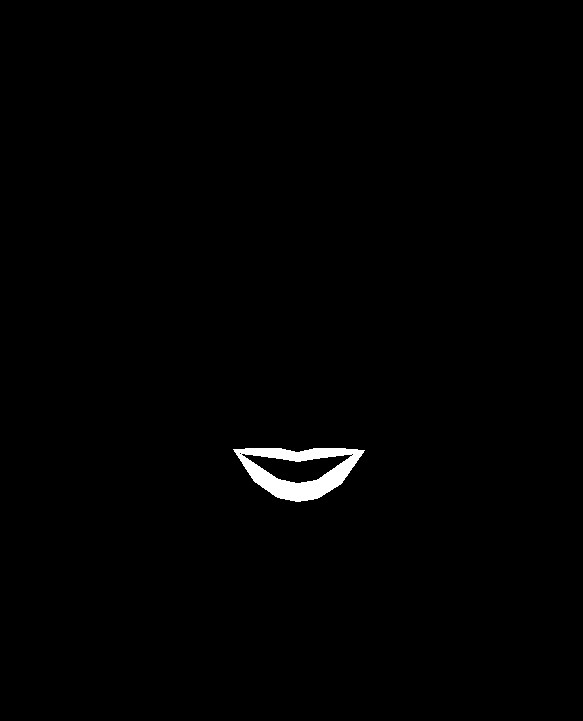

In [17]:
cv2_imshow(mask)

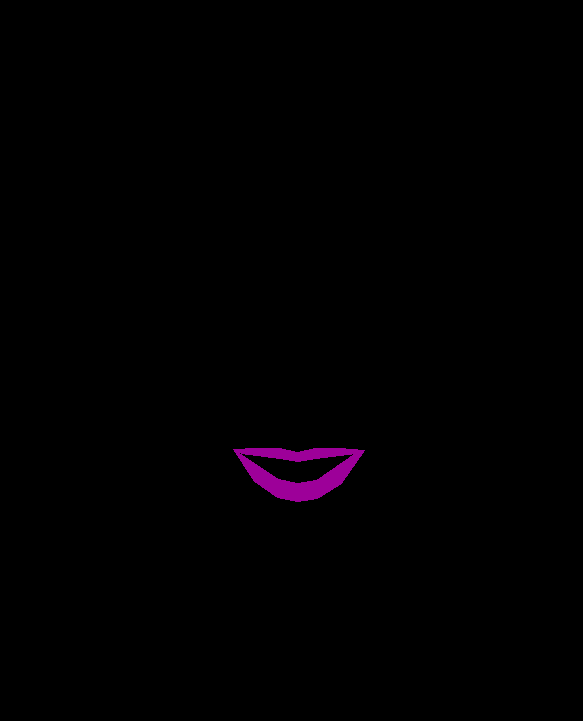

In [24]:
imgColorLips=np.zeros_like(mask)
imgColorLips[:]=153,0,157
imgColorLips=cv2.bitwise_and(mask,imgColorLips)
cv2_imshow(imgColorLips)

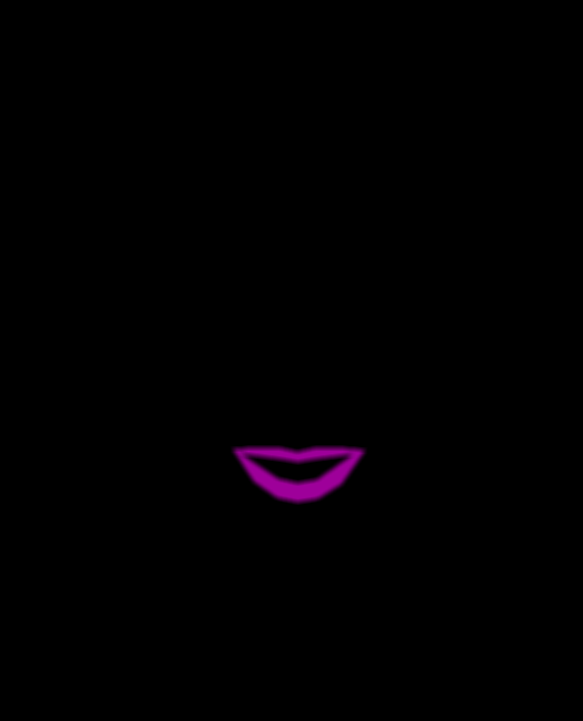

In [25]:
imgColorLips=cv2.GaussianBlur(imgColorLips,(7,7),10)
cv2_imshow(imgColorLips)

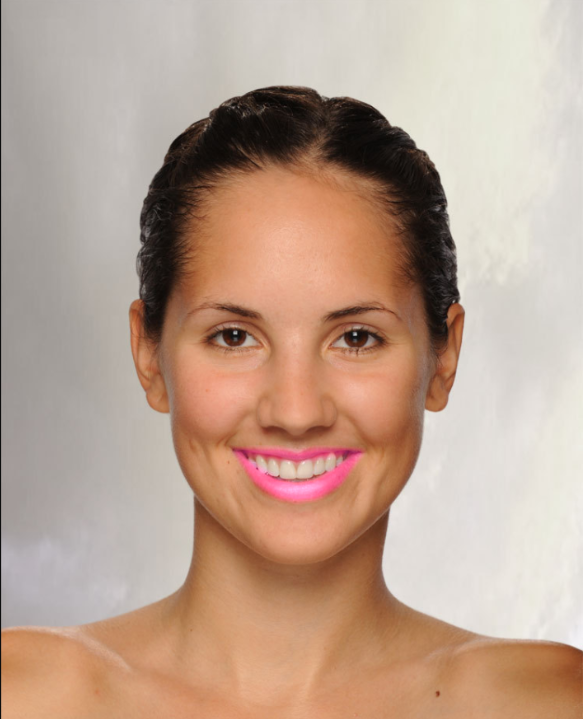

In [27]:
imgColorLips=cv2.addWeighted(img,1,imgColorLips,0.4,0)
cv2_imshow(imgColorLips)